In [1]:
#meta 1/5/2024 NLP for UDS demo. Part 0 Data
# Text Analytics. Trends and topic modeling for UDS
#      Data: How did you...

#      input: myData/howdidu.csv
#      output: myData/howdidu_tidy.csv
#history
#1/5/2024 NLP FOR UDS

#1/10/2024 MISC
#      Added EDA tidy_df 'Counts by Contact Description'

#1/31/2024 MISC
#      Focus on tidy_df -> 'Contact Description'

#2/10/2004 META: MOVE TO MAC
#      local: get csv from ~2023-12-31


#Pipeline: nlp_0_data  (here) -> nlp_1_dataprep (here) -> nlp_2_model 

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import csv

In [3]:
print(sys.version)
np.__version__, pd.__version__

3.10.10 (main, Jan 17 2024, 01:36:04) [Clang 12.0.5 (clang-1205.0.22.11)]


('1.26.3', '2.1.4')

In [4]:
#----- GlOBAL VARS -----
#data
DATA_DIR = 'myData'
DATA_FILE_IN = DATA_DIR + '/howdidu.csv' #$config
DATA_FILE_OUT = DATA_DIR + '/howdidu_tidy.csv' 

# NLP: Text Analytics 
Prep data for Text Analytics

## 0. Load Data

In [6]:
df = pd.read_csv(DATA_FILE_IN)

print(df.shape)
print(df.columns)
df.head();

(361, 11)
Index(['First Name', 'Last Name', 'Contact rpt. summary',
       'Contact rpt. description', 'Contact rpt. type', 'Contact rpt. date',
       'LGL Constituent ID', 'Home Phone', 'Home Email',
       'Contact rpt. team member', 'Last contact rpt.'],
      dtype='object')


## 0.1 EDA
raw df

Contact rpt. type
Initial Contact                    215
Text                                60
Email                               20
Email, Text                          6
Text, Email                          6
Text, Phone, Email                   4
Clarify Volunteering commitment      2
Phone                                2
Call                                 1
Person to person                     1
Phone call                           1
Meeting                              1
Name: count, dtype: int64


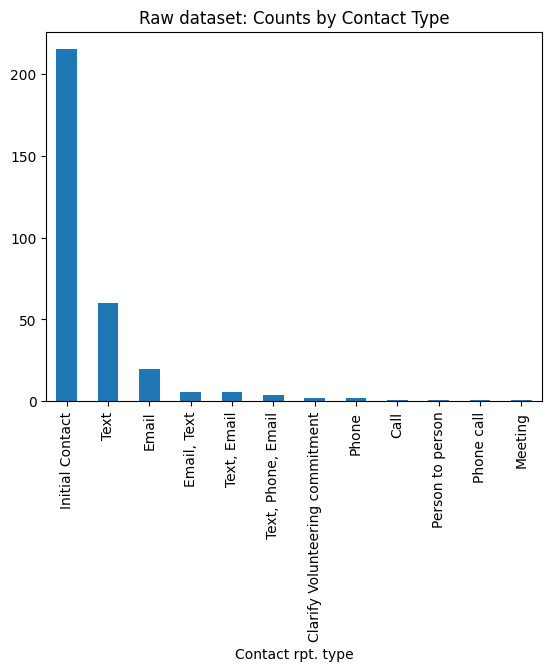

In [7]:
print(df['Contact rpt. type'].value_counts())
df['Contact rpt. type'].value_counts().plot(kind='bar', title = 'Raw dataset: Counts by Contact Type')
plt.xticks(); #rotation=75

In [8]:
df[df['Contact rpt. type'] == 'Text, Phone, Email'];

# 1. Prep Data
## 1.0 Raw df  
- Manage duplicates

In [9]:
print(df.duplicated(keep=False).sum())
df[df.duplicated(keep=False)].sort_values('LGL Constituent ID');

22


In [10]:
#drop dups
df.drop_duplicates(inplace=True)
df.shape

(350, 11)

## 1.1 Tidy df

In [11]:
#select relevant columns
tidy_include = ['LGL Constituent ID', 'First Name', 'Last Name','Contact rpt. description', 'Contact rpt. type']
df_tidy = df[tidy_include].copy()
print(df_tidy.shape)
df_tidy.info()

(350, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 360
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   LGL Constituent ID        350 non-null    int64 
 1   First Name                350 non-null    object
 2   Last Name                 347 non-null    object
 3   Contact rpt. description  328 non-null    object
 4   Contact rpt. type         308 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.4+ KB


In [12]:
#standardize nulls
df_tidy['Contact rpt. description'] = df_tidy['Contact rpt. description'].fillna('__no_comment__')
df_tidy['Contact rpt. description'].value_counts()

Contact rpt. description
__no_comment__                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        22
Txt again                                                             

- Manage duplicates  
tidy dataset

In [13]:
print(df_tidy.duplicated(keep=False).sum())
df_tidy[df_tidy.duplicated(keep=False)].sort_values('LGL Constituent ID');

48


In [14]:
#example why different now 
df[df['LGL Constituent ID']==945162];

In [15]:
#drop dups
df_tidy.drop_duplicates(inplace=True)
df_tidy.shape

(326, 5)

In [16]:
df_tidy['contact_report_desc_short'] = df_tidy['Contact rpt. description'].str[:40]
print(df_tidy.shape)
df_tidy.head();

(326, 6)


### 1.1a EDA
tidy df

Contact rpt. type
Initial Contact                    212
Text                                39
Email                               13
Email, Text                          5
Text, Email                          5
Text, Phone, Email                   3
Clarify Volunteering commitment      2
Call                                 1
Person to person                     1
Phone call                           1
Phone                                1
Meeting                              1
Name: count, dtype: int64


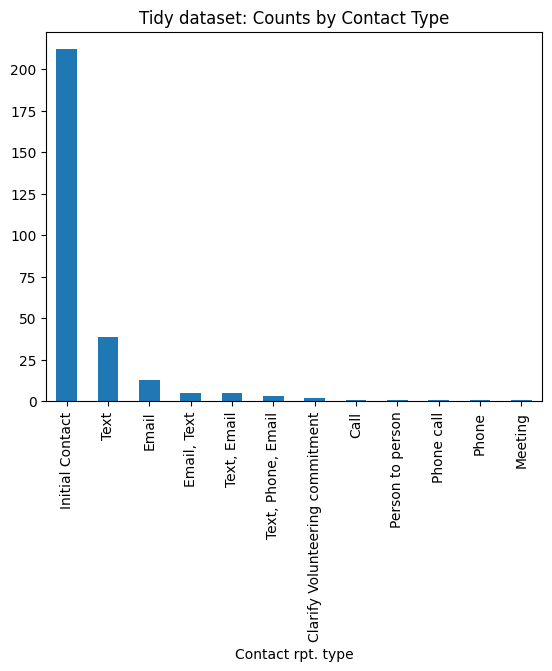

In [17]:
print(df_tidy['Contact rpt. type'].value_counts())
df_tidy['Contact rpt. type'].value_counts().plot(kind='bar', title = 'Tidy dataset: Counts by Contact Type')
plt.xticks();

In [18]:
df_tidy['Contact rpt. description'].value_counts()

Contact rpt. description
__no_comment__                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        21
How did you hear about Ukraine Defense Support?: At an event          

In [19]:
df_tidy['contact_report_desc_short'].value_counts()

contact_report_desc_short
How did you hear about Ukraine Defense S    40
__no_comment__                              21
13Sept22 Carl texted                         8
Txt again                                    7
Skyfest \nN/A                                7
                                            ..
I reached out to Svitlana with this mess     1
Renton event  \nN/A                          1
Call. Said he wanted to volunteer but di     1
friend  \nN/A                                1
Sent email with greetings Dec26              1
Name: count, Length: 214, dtype: int64

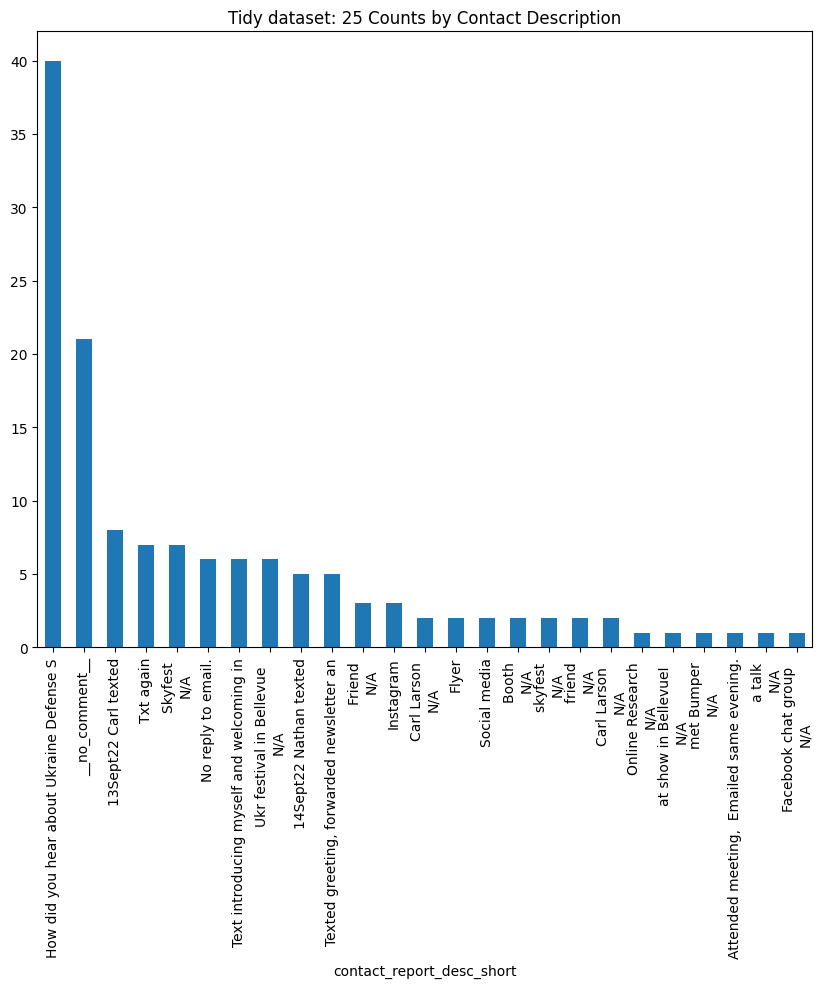

In [20]:
TOP_K = 25
df_tidy['contact_report_desc_short'].value_counts(ascending=False)[:TOP_K].plot(kind='bar', title = 'Tidy dataset: ' + str(TOP_K) + ' Counts by Contact Description', figsize = (10, 8));
plt.xticks();

- Persist

In [21]:
df_tidy.to_csv(DATA_FILE_OUT)